# Avocado is a fruit consumed by people heavily in the United States. 

##### Content:
>This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how 
    the Hass Avocado Board describes the data on their website:

> The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.




# Some relevant columns in the dataset:

    1. Date - The date of the observation
    2. AveragePrice - the average price of a single avocado
    3. type - conventional or organic
    4. year - the year
    5. Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 -         Total number of avocados with PLU 4046 sold
    4225 -         Total number of avocados with PLU 4225 sold
    4770 -         Total number of avocados with PLU 4770 sold

##### We will start our Analysis in importing the required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
df = pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### the above dataset have NaN values after 1510th we will remove all the NaN columns

In [3]:
df = df.iloc[:1510,:]

In [4]:
df.drop("Unnamed: 0", inplace = True, axis = 1)

WE WILL DIVIDE DATE COLUMN INTO TWO CATEGORIES WHICH WILL HELP IN OUR ANALYSIS

In [5]:
df.Date = pd.to_datetime(df.Date)
Day = df.Date.dt.day.to_frame()
month = df.Date.dt.month.to_frame()

Date= Day.join(month, how='right', lsuffix='_day', rsuffix="_month")
df = df.join(Date, how= "left")
df.drop("Date", inplace = True, axis = 1)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Date_day,Date_month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,1.34,154742.81,39221.82,46285.90,9451.98,59783.11,48016.74,11766.37,0.0,conventional,2016.0,Charlotte,12,4
1506,1.54,131453.85,38976.01,34346.09,8265.03,49866.72,44005.31,5861.41,0.0,conventional,2016.0,Charlotte,27,11
1507,1.57,135608.11,44044.69,28907.47,13913.04,48742.91,42721.62,6021.29,0.0,conventional,2016.0,Charlotte,20,11
1508,1.64,144089.12,49399.39,26597.39,22714.68,45377.66,38436.79,6940.87,0.0,conventional,2016.0,Charlotte,13,11


In [6]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Date_day', 'Date_month'],
      dtype='object')

In [7]:
df['Date_month']=df['Date_month'].astype('str')
df['Date_day']=df['Date_day'].astype('str')

# Encoding the Data with Label Encoder converting all the catagorical data into numeric values.

In [8]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
catagorical_data = ['type', 'region', "Date_month", 'Date_day']

for i in catagorical_data:
    df[i]=LE.fit_transform(df[i])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1510 non-null   float64
 1   Total Volume  1510 non-null   float64
 2   4046          1510 non-null   float64
 3   4225          1510 non-null   float64
 4   4770          1510 non-null   float64
 5   Total Bags    1510 non-null   float64
 6   Small Bags    1510 non-null   float64
 7   Large Bags    1510 non-null   float64
 8   XLarge Bags   1510 non-null   float64
 9   type          1510 non-null   int32  
 10  year          1510 non-null   float64
 11  region        1510 non-null   int32  
 12  Date_day      1510 non-null   int32  
 13  Date_month    1510 non-null   int32  
dtypes: float64(10), int32(4)
memory usage: 141.7 KB


### Lets Check the NaN values

In [10]:
df.isna().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Date_day        0
Date_month      0
dtype: int64

There is no Null values in the data Lets check for the correlation of the data

In [11]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Date_day,Date_month
AveragePrice,1.000000,-0.138816,-0.189156,-0.089724,-0.099446,-0.109739,-0.095698,-0.176563,-0.046122,NaN,0.159641,-0.223469,-0.001174,-0.016823
Total Volume,-0.138816,1.000000,0.985562,0.987148,0.934346,0.967675,0.960625,0.910190,0.521531,NaN,-0.000816,0.235746,0.020465,0.002916
4046,-0.189156,0.985562,1.000000,0.951931,0.898553,0.930365,0.922245,0.884182,0.473866,NaN,-0.037670,0.268769,0.032535,0.010305
4225,-0.089724,0.987148,0.951931,1.000000,0.927759,0.951757,0.943964,0.900456,0.504518,NaN,-0.003761,0.214802,0.011153,-0.002659
4770,-0.099446,0.934346,0.898553,0.927759,1.000000,0.926399,0.923598,0.840485,0.645959,NaN,0.031985,0.137434,0.020074,0.003523
Total Bags,-0.109739,0.967675,0.930365,0.951757,0.926399,1.000000,0.997340,0.911300,0.601708,NaN,0.094506,0.189124,0.007829,-0.004196
Small Bags,-0.095698,0.960625,0.922245,0.943964,0.923598,0.997340,1.000000,0.879083,0.611157,NaN,0.110947,0.167741,0.010729,-0.001123
Large Bags,-0.176563,0.910190,0.884182,0.900456,0.840485,0.911300,0.879083,1.000000,0.447583,NaN,-0.015836,0.296865,-0.009206,-0.021293
XLarge Bags,-0.046122,0.521531,0.473866,0.504518,0.645959,0.601708,0.611157,0.447583,1.000000,NaN,0.223878,-0.047330,0.010217,0.008580
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Clearly "type" has no relation with any other column but lets check what are the unique values in "type" since "type" being a categorical column as above description.

In [12]:
df["type"].unique()

array([0])

Since "type" has only one value because of which it has no Correlation so we will remove "type"

In [13]:
df.drop("type", inplace = True, axis = 1)

# We will visualize the correlation in a Graph

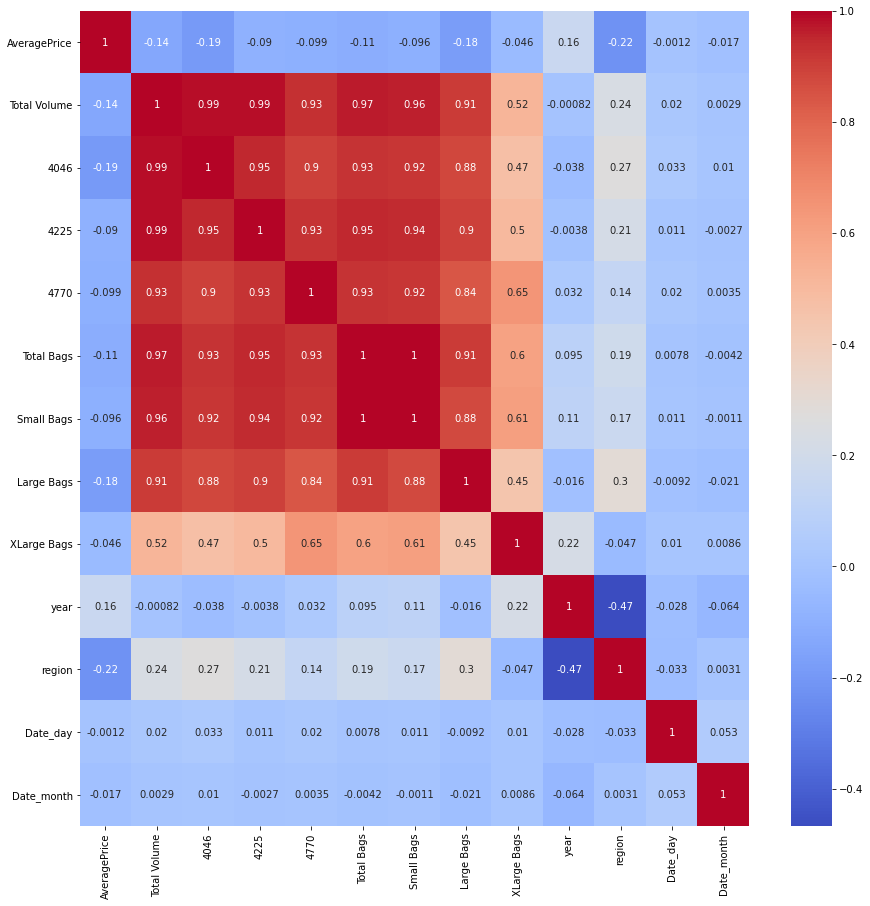

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True, cmap = "coolwarm")
plt.show()

The observation of Correlation and the detail we will visualize with Target variable
    1. AveragePrice
    2. region

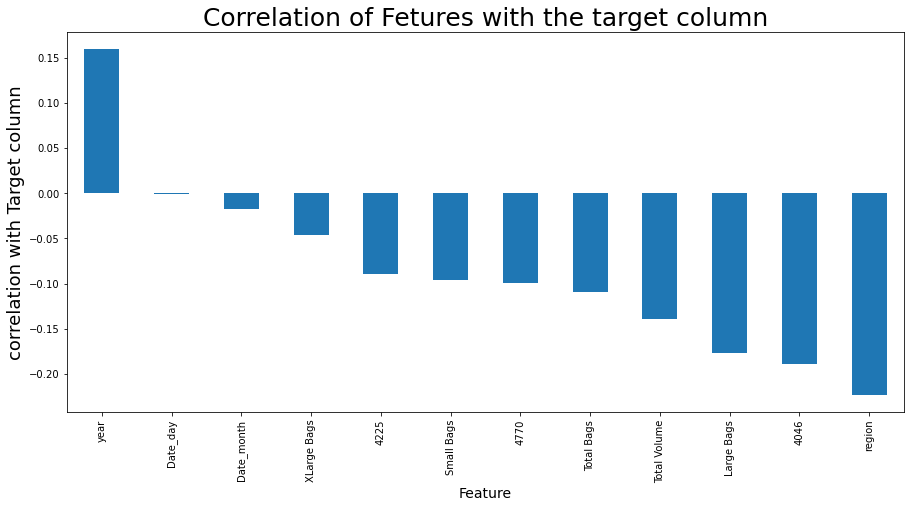

In [15]:
plt.figure(figsize=(15,7))
df.corr()["AveragePrice"].sort_values(ascending=False).drop(["AveragePrice"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()

# Key Observations:
    Date_month      0.159641
    year            0.159641
    Date_year       0.089223
    Date_year       0.055354
    XLarge Bags    -0.046122
    4225           -0.089724
    Small Bags     -0.095698
    4770           -0.099446
    Total Bags     -0.109739
    Total Volume   -0.138816
    Large Bags     -0.176563
    4046           -0.189156
    region         -0.223469
    

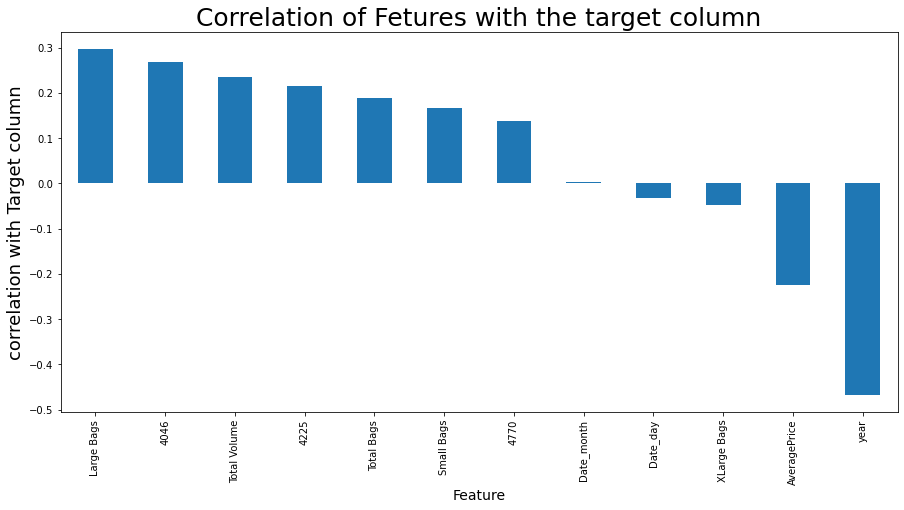

In [16]:
plt.figure(figsize=(15,7))
df.corr()["region"].sort_values(ascending=False).drop(["region"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()

# Key observation:
    Large Bags      0.296865
    4046            0.268769
    Total Volume    0.235746
    4225            0.214802
    Total Bags      0.189124
    Small Bags      0.167741
    4770            0.137434
    Date_year       0.003420
    Date_year      -0.027127
    XLarge Bags    -0.047330
    AveragePrice   -0.223469
    Date_month     -0.467656
    year           -0.467656

# Skeness Identification

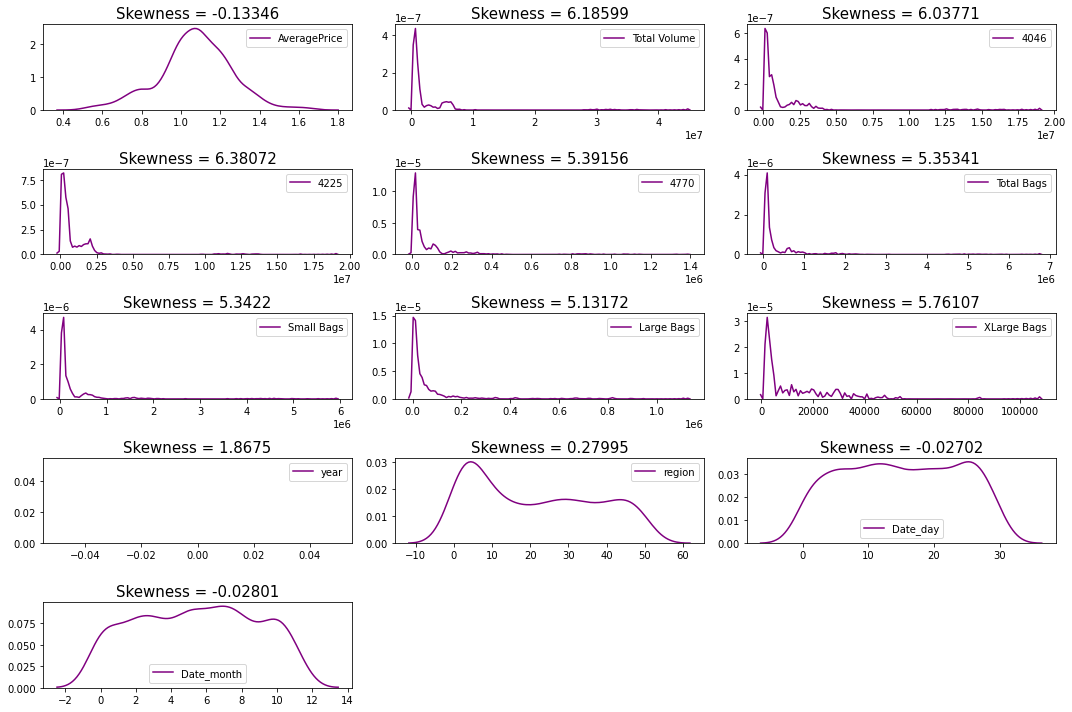

In [17]:
plt.figure(figsize=(15,10))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(5,3,i+1)         
    sns.kdeplot(df[collist[i]], color = "purple")
    plt.title(f"Skewness = {round(df[collist[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

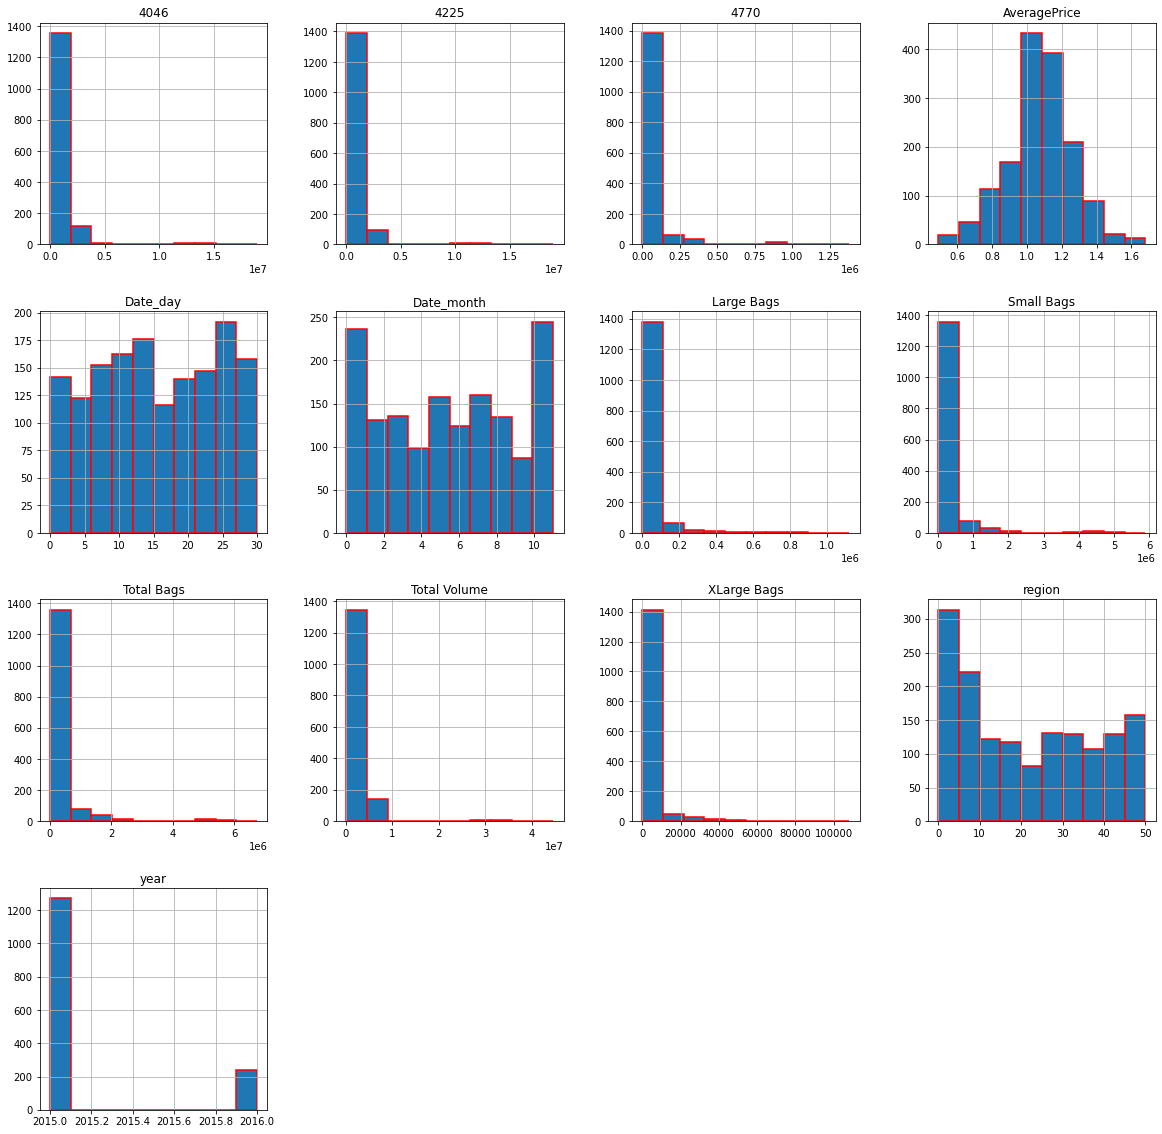

In [18]:
df.hist(edgecolor="red",linewidth= 1.5, figsize= (20,20))
plt.show()

In [19]:
skewness=[]
for i in df.skew().values:
    skewness.append(i)
    
df_skewness= pd.DataFrame({"Feature_names": collist,"Skew": skewness})
df_skewness= df_skewness.sort_values(by="Skew", ascending=False, ignore_index= True)


skew_postive_row= []
skew_negative_row=[]
for index, row in df_skewness.iterrows():
    if row['Skew']>0.49:
        skew_postive_row.append(row['Feature_names'])
    elif row['Skew']< -0.49:
        skew_negative_row.append(row['Feature_names'])
        
df_skewness

,Feature_names,Skew
0,4225,6.380717
1,Total Volume,6.185985
2,4046,6.037710
3,XLarge Bags,5.761068
4,4770,5.391558
5,Total Bags,5.353407
6,Small Bags,5.342199
7,Large Bags,5.131723
8,year,1.867504
9,region,0.279950


In [20]:
print("\n\nFeature names with Skewness is present more than +/-0.5 as follows:\n","\n\nPostive Skewed data:\n", skew_postive_row,"\n\nnegative Skewed data:\n", skew_negative_row)       



Feature names with Skewness is present more than +/-0.5 as follows:
 

Postive Skewed data:
 ['4225', 'Total Volume', '4046', 'XLarge Bags', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'year'] 

negative Skewed data:
 []


In [21]:
df.skew().mean()

3.657179835126921

# Key Observation:
    We have Nine columns which has skewness greater than +0.5 as mentioned above no column below -0.5 skewness. 
    And also average skewness of whole dateset is greater than 3.5 we further will work with skewness in the data. 

# Lets Identify the Outliers

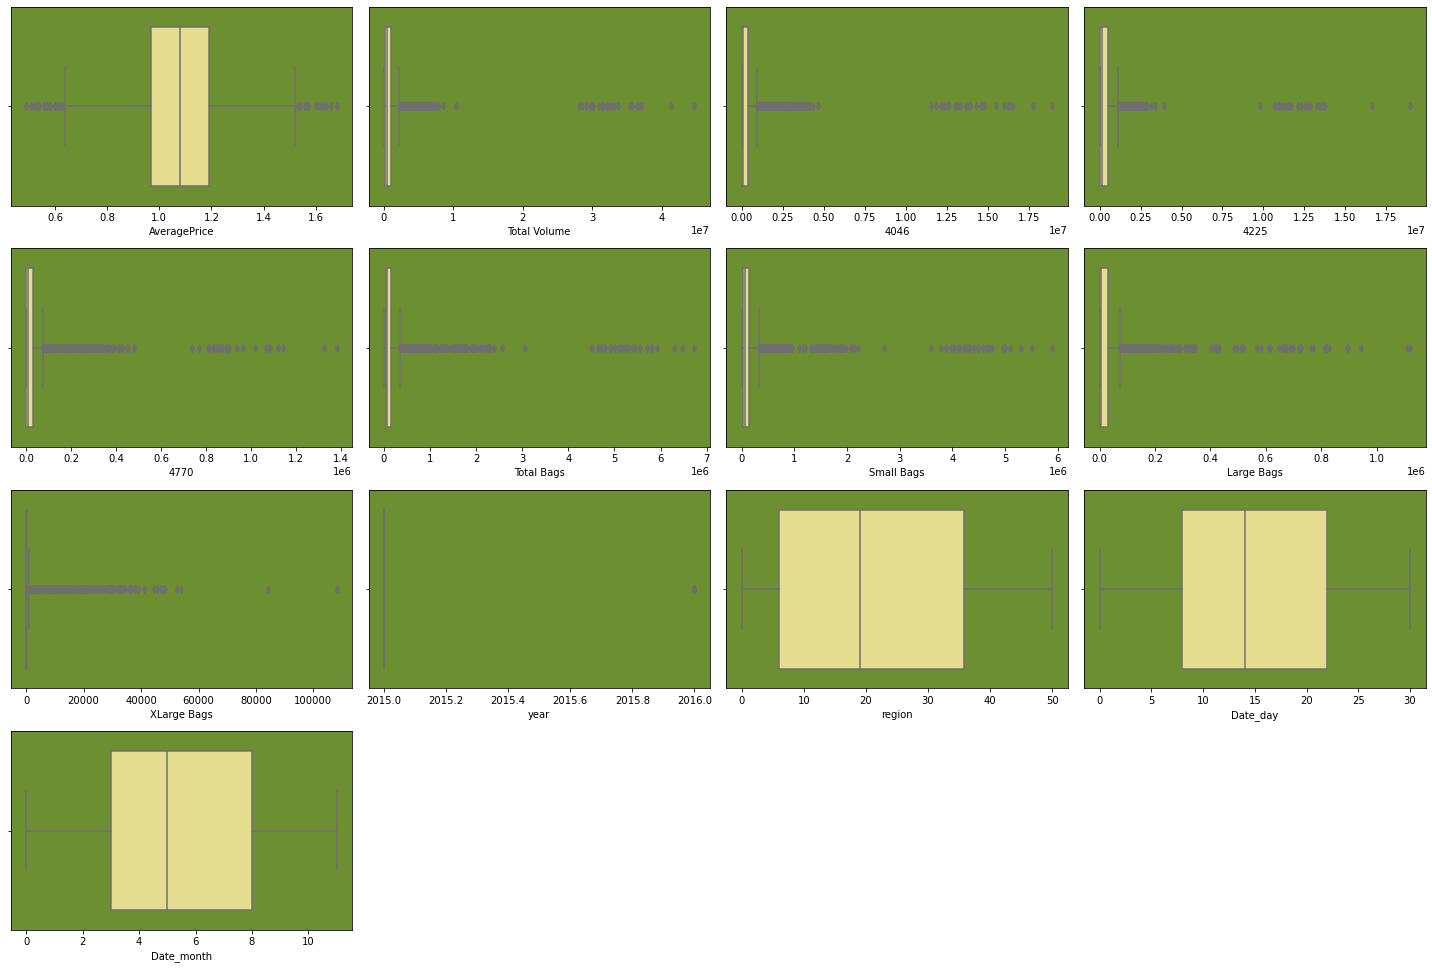

In [22]:
plt.figure(figsize=(20,50))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(15,4,i+1)
    ax=sns.boxplot(df[collist[i]], color = "#F2E880" , orient = "h")
    ax.set_facecolor("#6C8F32")
    plt.tight_layout()

# From the above observation its evident that the data have more outliers lets try in removing the outliers.

In [23]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

df_new1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df_new1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Date_day,Date_month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0,19,3
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0,12,3
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0,4,3
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0,3,8
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,0.71,916367.42,611270.39,205181.23,14107.36,85808.44,82065.70,3742.74,0.0,2015.0,50,11,0
1266,0.80,720800.61,519142.82,124248.86,10573.29,66835.64,65072.69,1762.95,0.0,2015.0,50,17,0
1267,0.80,729795.72,516446.41,128438.87,12473.14,72437.30,71564.22,873.08,0.0,2015.0,50,9,0
1268,0.92,584896.99,347125.63,129717.42,27944.07,80109.87,78503.46,1606.41,0.0,2015.0,50,0,2


In [24]:
print(f"Orginal Data {df.shape}\nAfter Removing outliers {df_new1.shape}\nThe percentage of data loss {((1510-894)/1510)*100}%")

Orginal Data (1510, 13)
After Removing outliers (894, 13)
The percentage of data loss 40.794701986754966%


In [25]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
threshold= 3
df_new = df[(z < 3).all(axis=1)]

In [26]:
print(f"Orginal Data {df.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((1510-1427)/1510)*100}%")

Orginal Data (1510, 13)
After Removing outliers (1427, 13)
The percentage of data loss 5.496688741721854%


#### The loss of data is 5.49% in Z-Score method and 40% in IQR method which is pity bad and on removing the same will affect the performance of the data so we have to work with the outliers present in the data.

In [27]:
Avacado_color_1 ="#F2E880"
Avacado_color_2 ="#FFE12D"
Avacado_color_3 ="#8BC451"
Avacado_color_4 ="#356211"
Avacado_color_5 ="#6C8F32"

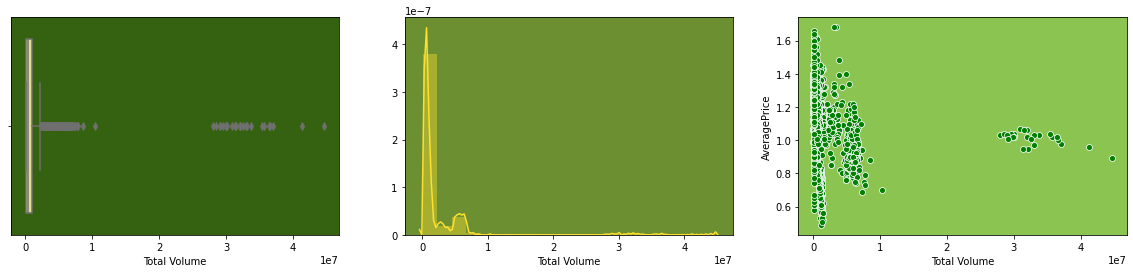

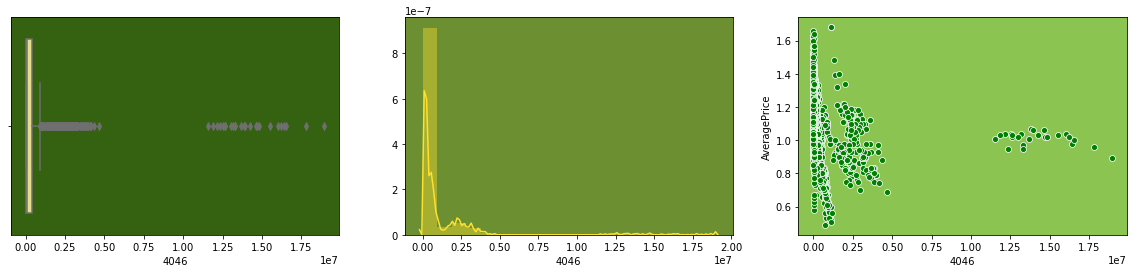

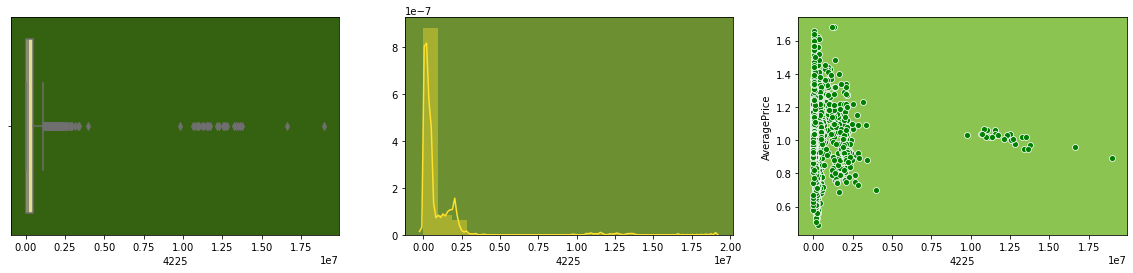

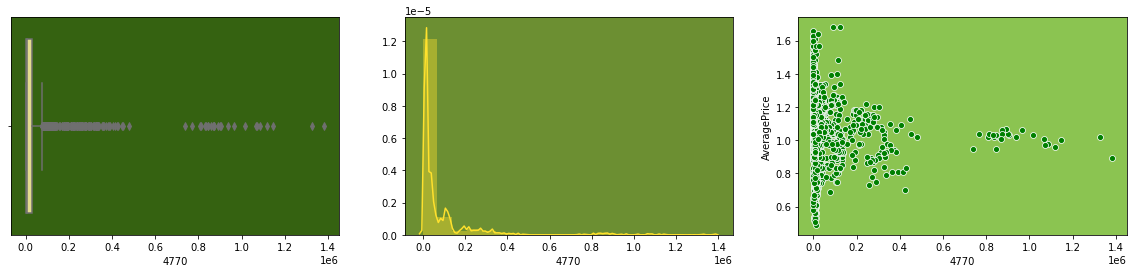

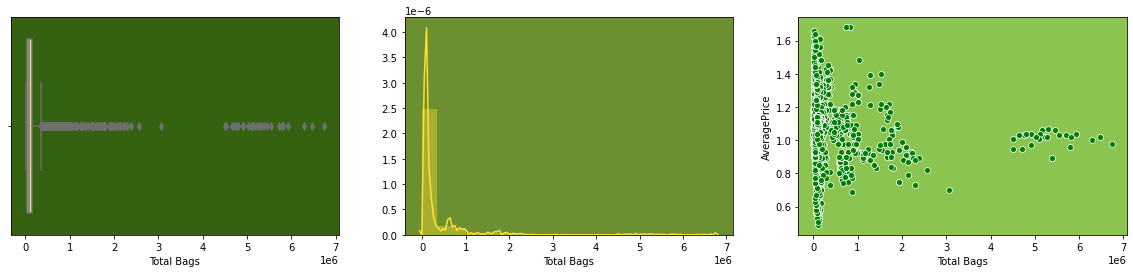

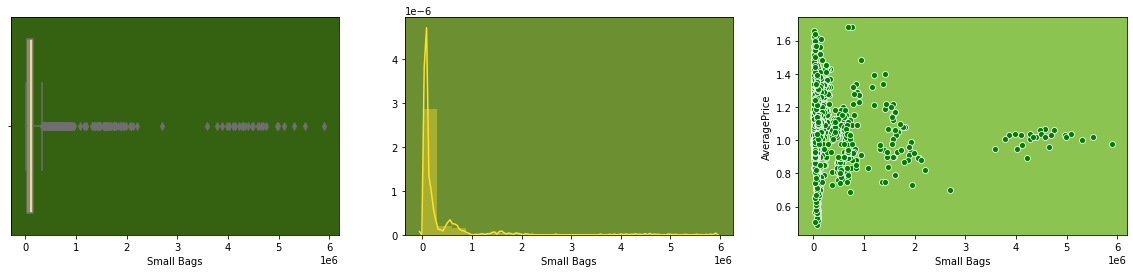

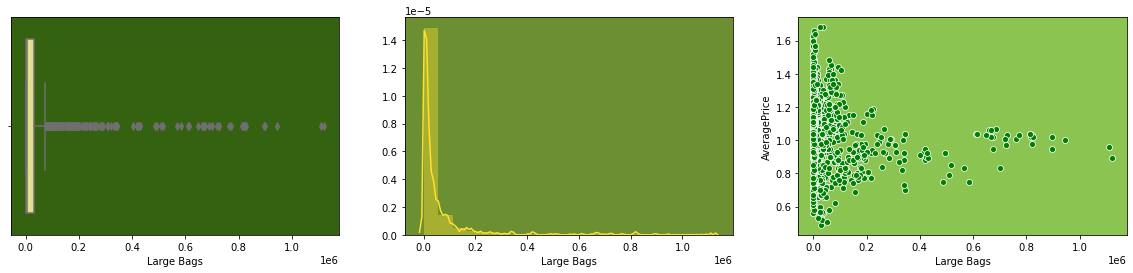

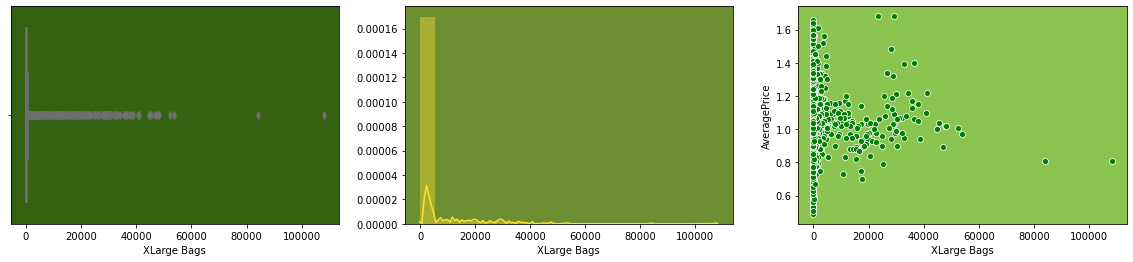

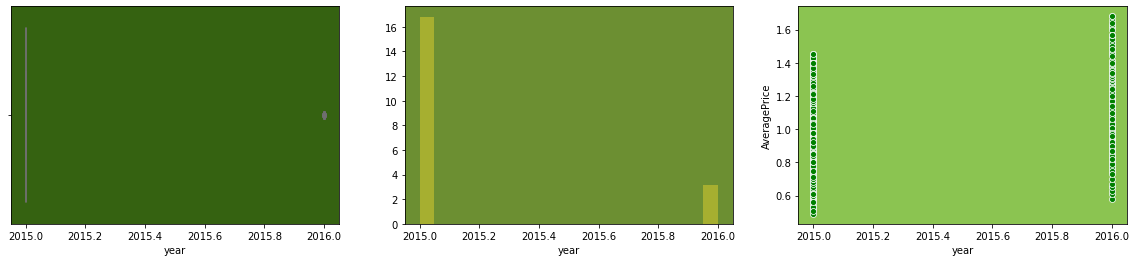

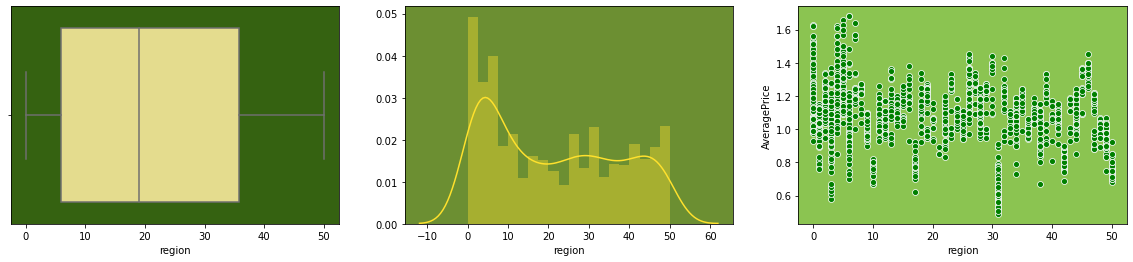

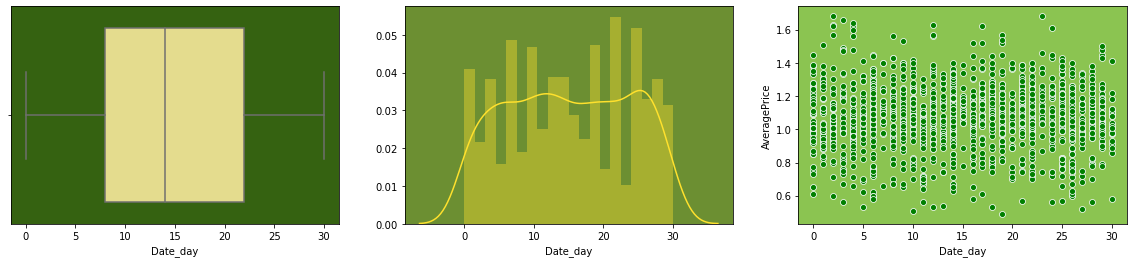

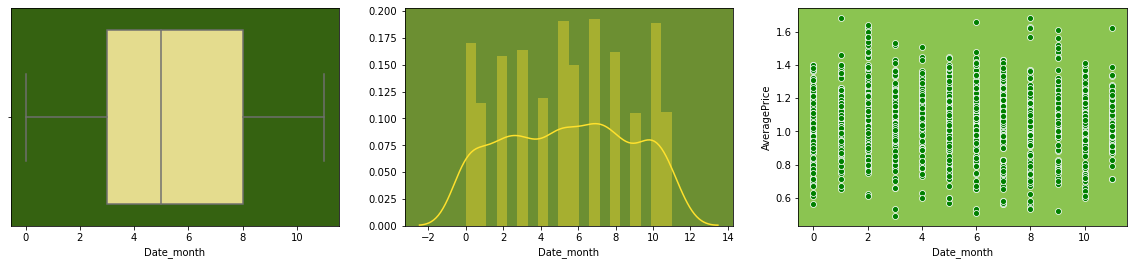

In [28]:
target_variable_1 = "AveragePrice"
feature_variable = ['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region',
       'Date_day', 'Date_month']

def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(20, 4))
    a1=sns.boxplot(x=df[feature_name], ax=axs[0], color=Avacado_color_1)
    a1.set_facecolor(Avacado_color_4)
    a2=sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1],color=Avacado_color_2)
    a2.set_facecolor(Avacado_color_5)
    a3=sns.scatterplot(data=df, x=feature_name, y=target_variable_1, ax=axs[2], color="g")
    a3.set_facecolor(Avacado_color_3)
    plt.show()
    
for i in feature_variable:
    num_plots(i)  

#### The above is the observation of the Feature variable with Target variable 1 as clear that the variable which has more correlation has more scattered points in the data

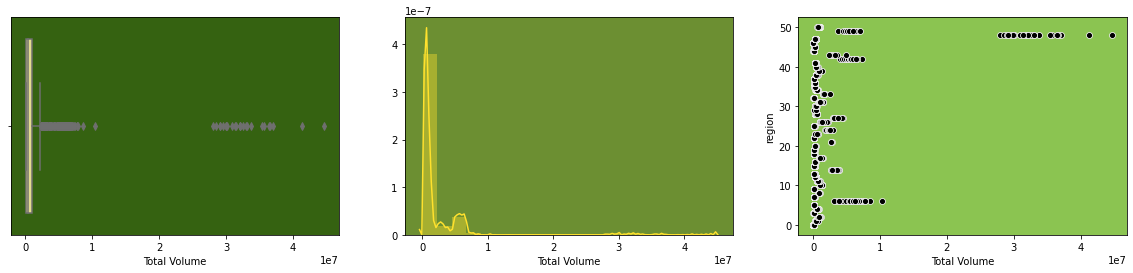

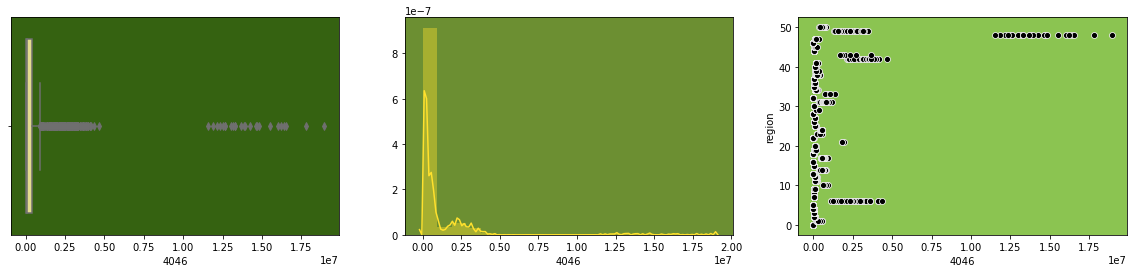

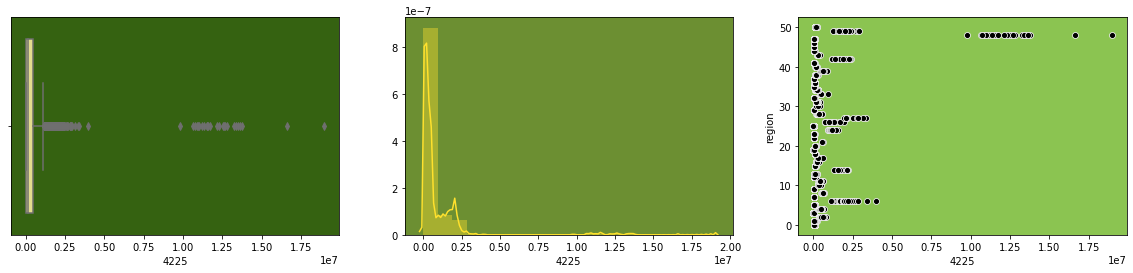

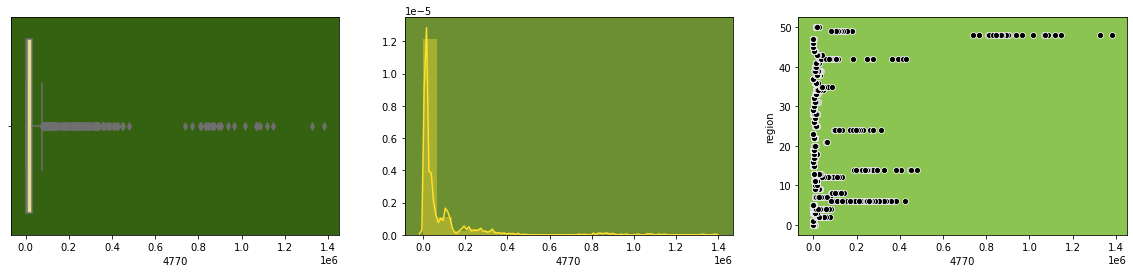

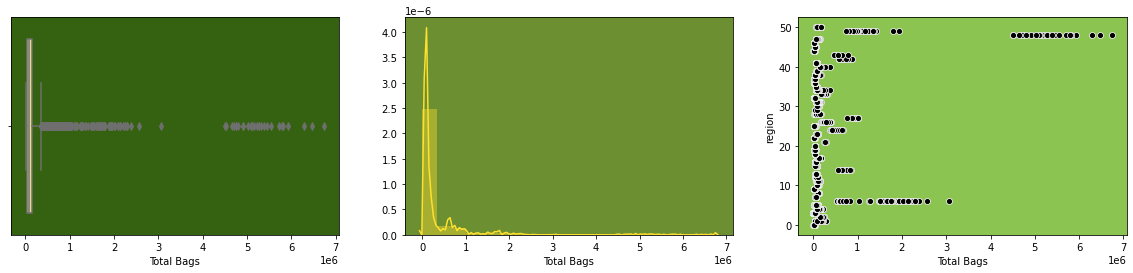

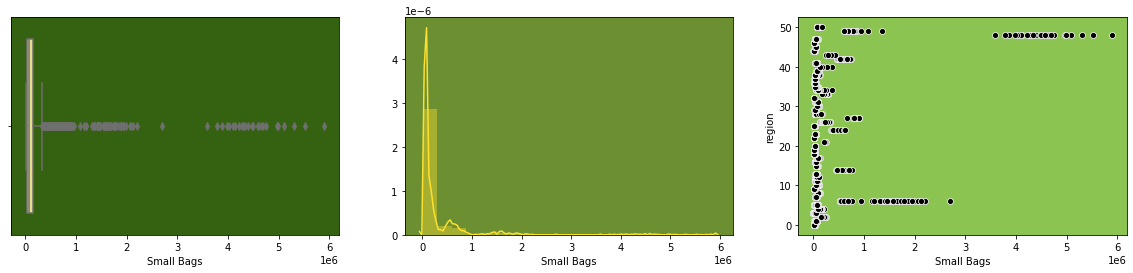

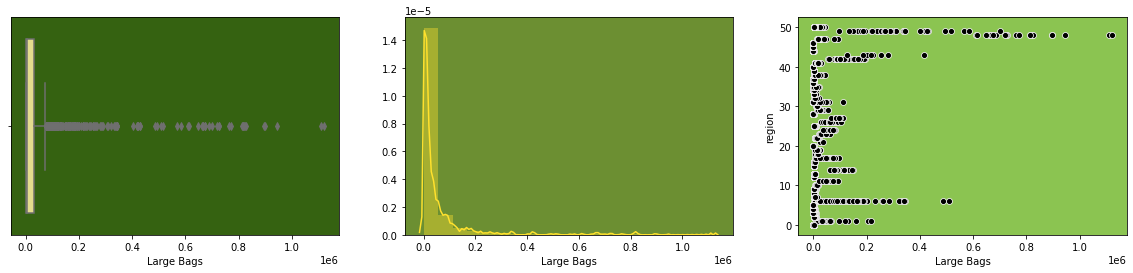

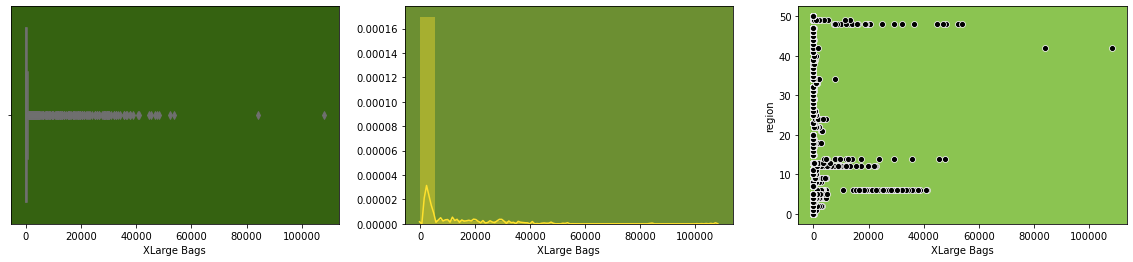

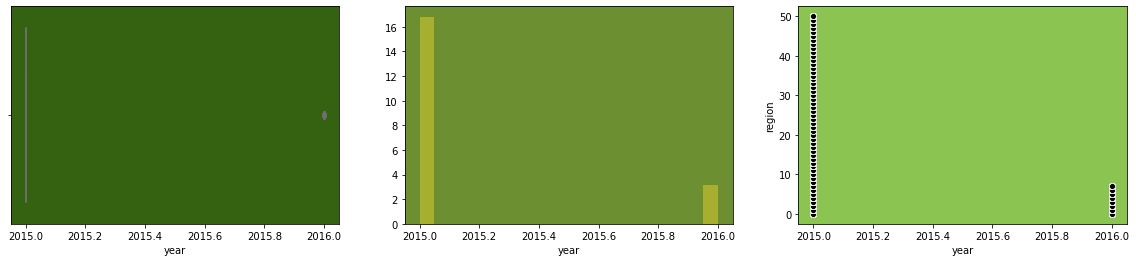

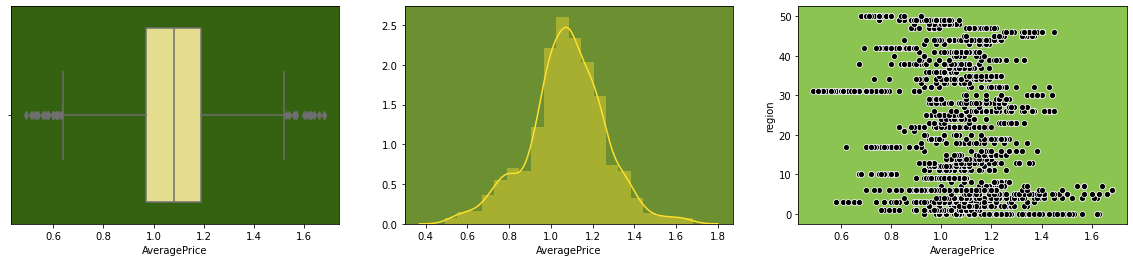

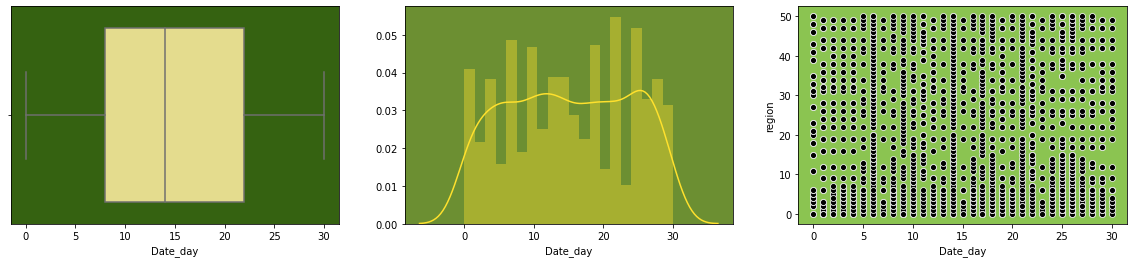

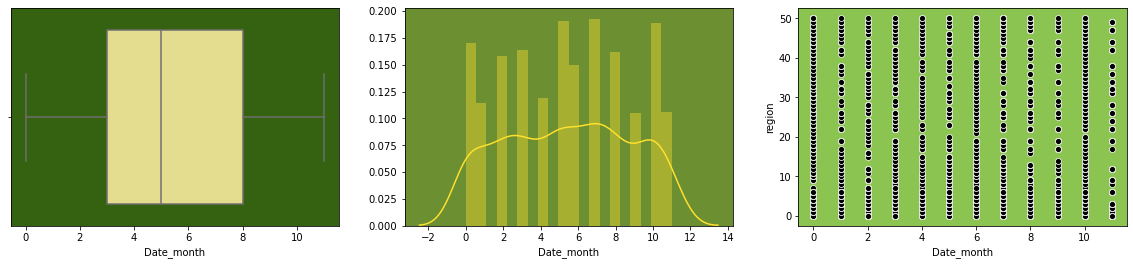

In [29]:
target_variable_2 = 'region'
feature_variable = ['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year',"AveragePrice" ,
       'Date_day', 'Date_month']

def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(20, 4))
    a1=sns.boxplot(x=df[feature_name], ax=axs[0], color=Avacado_color_1)
    a1.set_facecolor(Avacado_color_4)
    a2=sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1],color=Avacado_color_2)
    a2.set_facecolor(Avacado_color_5)
    a3=sns.scatterplot(data=df, x=feature_name, y=target_variable_2, ax=axs[2], color="k")
    a3.set_facecolor(Avacado_color_3)
    plt.show()
    
for i in feature_variable:
    num_plots(i) 

#### As similar to Target variable 1 the above is the observation of the Feature variable with Target variable 2 as clear that the variable which has more correlation has more scattered points in the data

In [30]:
x_2=df.drop(["region"], axis = 1)
y_2=df.region
x_1=df.drop(["AveragePrice"], axis = 1)
y_1=df.AveragePrice
# x_1 is target vatiable 1 y_1 is the feature variable 1
# x_2 is target vatiable 1 y_2 is the feature variable 1

In [89]:
df["region"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

# Scaling the DataSet

In [31]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_1, x_2= sc.fit_transform(x_1), sc.fit_transform(x_2)
x_1

array([[-0.34773632, -0.33221779, -0.33392873, ..., -1.31774282,
         0.45522877, -0.7251849 ],
       [-0.34984393, -0.33240356, -0.33978631, ..., -1.31774282,
        -0.34380279, -0.7251849 ],
       [-0.33558025, -0.33234184, -0.30129042, ..., -1.31774282,
        -1.25698172, -0.7251849 ],
       ...,
       [-0.33166483, -0.31017432, -0.34917375, ..., -0.88391295,
        -0.34380279, -1.02290899],
       [-0.32975507, -0.3074298 , -0.35055225, ..., -0.88391295,
        -1.25698172, -1.02290899],
       [-0.3302039 , -0.31386666, -0.35001283, ..., -0.88391295,
        -1.48527645,  0.76343555]])

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempacc = r2_score(y_test,y_pred)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")        
        

Best Accuracy 22.438974476616437 found on randomstate 139


In [34]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate)

In [35]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# Lets shortlist promising Regression models.

In [36]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestRegressor"]

In [37]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train_1,y_train_1)
    print("Score of", m, "is:", m.score(x_train_1,y_train_1))
    score.append(m.score(x_train_1,y_train_1))
    predm=m.predict(x_test_1)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test_1,predm))
    mean_abs_e.append(mean_absolute_error(y_test_1,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test_1,predm))
    mean_sqr_e.append(mean_squared_error(y_test_1,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test_1,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test_1,predm)))
    print("R2 SCORE: ", r2_score(y_test_1,predm))
    r2.append(r2_score(y_test_1,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.1498388809372967

ERROR:
MEAN ABSOLUTE ERROR:  0.1239851945682069
MEAN SQUARED ERROR:  0.02684960294985982
ROOT MEAN SQUARED ERROR : 0.1638584845220406
R2 SCORE:  0.22438974476616436
**********************************************************************************************************



Score of Lasso() is: 0.0

ERROR:
MEAN ABSOLUTE ERROR:  0.14275132275132274
MEAN SQUARED ERROR:  0.0347474369634813
ROOT MEAN SQUARED ERROR : 0.18640664409693475
R2 SCORE:  -0.0037566850539985097
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.14992478988226476

ERROR:
MEAN ABSOLUTE ERROR:  0.1241975918353143
MEAN SQUARED ERROR:  0.02692699800257795
ROOT MEAN SQUARED ERROR : 0.16409447889121057
R2 SCORE:  0.2221540172321429
**********************************************************************************************************



Score of ElasticNet() is: 0

In [38]:
mean_score= []
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS:")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS:
SCORE IS: [-1.52853858e-01  4.26120665e-02  1.72198116e-01 -1.92093444e+00
 -1.64539059e+18]
MEAN OF SCORE is : -3.2907811887005894e+17
Standard Deviation : 6.581562377401179e+17
**************************************************************************************************



SCORE OF Lasso() IS:
SCORE IS: [-0.14721305 -0.01797435 -0.01196993 -0.01359965 -0.00331011]
MEAN OF SCORE is : -0.03881341745019351
Standard Deviation : 0.05440870830282582
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS:
SCORE IS: [-0.1459328   0.04268698  0.16749491 -1.90655437 -0.21165598]
MEAN OF SCORE is : -0.4107922510495417
Standard Deviation : 0.7598907244139699
**************************************************************************************************



SCORE OF ElasticNet() IS:
SCORE IS: [-0.14721305 -0.01797435 -0.01196993 -0.01359965 -0.00331011]
MEAN OF SCORE i

In [39]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="SCORE", ascending=False)



,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
6,DecisionTreeRegressor,1.000000,-3.343075e-01,4.454379e-01,0.079683,0.014041,0.118496,0.594387
8,RandomForestRegressor,0.971956,1.342530e-01,2.605348e-01,0.061458,0.007412,0.086092,0.785894
7,AdaBoostRegressor,0.641752,2.458727e-01,9.002608e-02,0.095276,0.014185,0.119100,0.590240
5,KNeighborsRegressor,0.551700,-2.820562e-01,3.519515e-01,0.122085,0.027800,0.166733,0.196941
4,SVR,0.521672,1.035996e-01,3.202655e-01,0.099112,0.016416,0.128123,0.525801
2,Ridge,0.149925,-4.107923e-01,7.598907e-01,0.124198,0.026927,0.164094,0.222154
0,LinearRegression,0.149839,-3.290781e+17,6.581562e+17,0.123985,0.026850,0.163858,0.224390
1,Lasso,0.000000,-3.881342e-02,5.440871e-02,0.142751,0.034747,0.186407,-0.003757
3,ElasticNet,0.000000,-3.881342e-02,5.440871e-02,0.142751,0.034747,0.186407,-0.003757


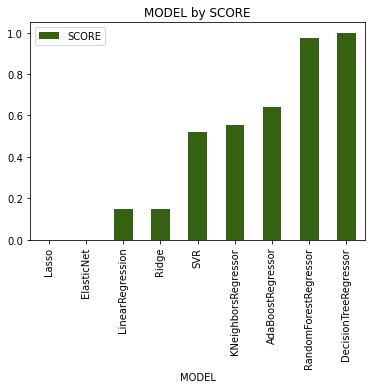

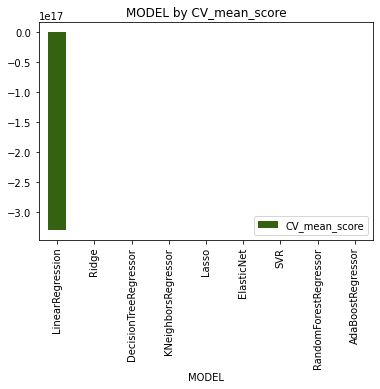

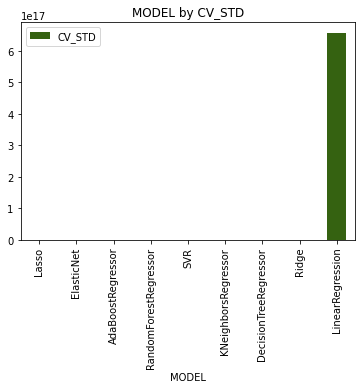

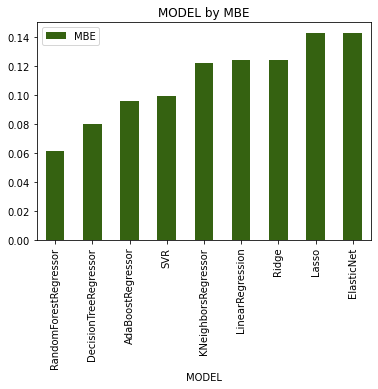

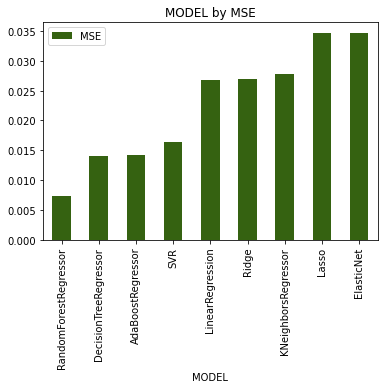

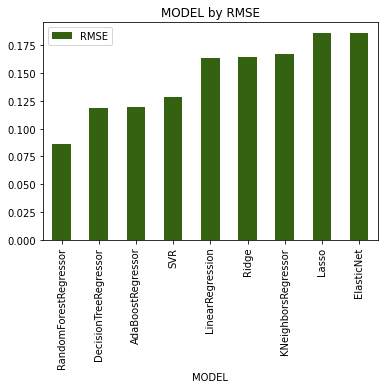

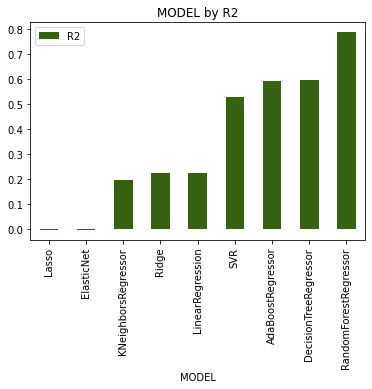

In [40]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = Avacado_color_4)
    plt.title(f"MODEL by {metric}")
    plt.show()

### From Above observation its is evident that Randomforest is the best model with Score of 0.97 lets try in Hyper tuning the same

In [41]:
rf = RandomForestRegressor(random_state=42)
cross_val_predict(rf, x_train_1, y_train_1, cv=5, n_jobs=-1).mean()

1.0796166077738518

In [42]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# HYPER TUNING.......

In [43]:
param_grid = [
    {"bootstrap": [True, False],
     "criterion": ["mse", "mae"],
     "n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
     "min_samples_split" : [2,4,8],
    }
]

rf = RandomForestRegressor(random_state=42)

In [44]:
reg_grid = GridSearchCV(rf, param_grid, n_jobs=-1, cv=5)

In [45]:
reg_grid.fit(x_train_1, y_train_1)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['mse', 'mae'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [2, 4, 8],
                          'n_estimators': [10, 20, 30, 50, 100]}])

In [46]:
reg_grid.best_score_

0.8212898551945109

In [47]:
reg_grid.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_split=4,
                      random_state=42)

In [49]:
reg_final_model = reg_grid.best_estimator_
preds = cross_val_predict(reg_final_model, x_train_1, y_train_1, cv=5, n_jobs=-1)
preds.mean()

1.078623910482921

In [50]:
reg_final_model.fit(x_train_1,y_train_1)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_split=4,
                      random_state=42)

In [51]:
reg_final_model.score(x_train_1,y_train_1)

0.9971402500921518

### Post the hyper tuning we can see that the performance of the RandomForest Regressor has increased from 97% - 99%. 

# Lets Train our second Target variable

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


accu = 0
for i in range(0,1000):
    x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size = .25, random_state = i)
    mod = GaussianNB()
    mod.fit(x_train_2,y_train_2)
    y_pred = mod.predict(x_test_2)
    tempacc = accuracy_score(y_test_2,y_pred)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")  

Best Accuracy 88.09523809523809 found on randomstate 45


In [53]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size = .25, random_state = best_rstate)

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics
import xgboost as xgb


# Lets shortlist promising Classification models.

In [55]:
def evaluate_model(estimator, x_train, y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, x_train, y_train, cv=cv, scoring=scoring)
    
    accuracy, accuracy_std = scores['test_accuracy'].mean(), \
                                scores['test_accuracy'].std()
    
    precision, precision_std = scores['test_precision'].mean(), \
                                scores['test_precision'].std()
    
    recall, recall_std = scores['test_recall'].mean(), \
                                scores['test_recall'].std()
    
    f1, f1_std = scores['test_f1'].mean(), scores['test_f1'].std()

    
    result = {
        "Accuracy": accuracy,
        "Accuracy std": accuracy_std,
        "Precision": precision,
        "Precision std": precision_std,
        "Recall": recall,
        "Recall std": recall_std,
        "f1": f1,
        "f1 std": f1_std,
    }
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return result

In [56]:
models_2 = [GaussianNB(), KNeighborsClassifier(), RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(random_state=42), ExtraTreeClassifier(random_state=42), 
          AdaBoostClassifier(random_state=42), GradientBoostingClassifier(random_state=42), 
          xgb.XGBClassifier()]

model_names_2 = ["Naive Bayes Gaussian", "K Neighbors Classifier", "Random Forest",
               "Decision Tree", "Extra Tree", "Ada Boost", 
               "Gradient Boosting", "XGBoost"]

In [59]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models_2)):
    print(f"\n\nStep {model+1} of {len(models_2)}")
    print(f"............................................................running {model_names_2[model]}")
    
    clf_scores = evaluate_model(models_2[model], x_train_2, y_train_2)
    
    accuracy.append(clf_scores["Accuracy"])
    precision.append(clf_scores["Precision"])
    recall.append(clf_scores["Recall"])
    f1.append(clf_scores["f1"])



Step 1 of 8
............................................................running Naive Bayes Gaussian
Accuracy: 0.8136446922147286 - (std: 0.01963046744633138)
Precision: 0.8590396039512058 - (std: 0.019368799987421945)
Recall: 0.8136446922147286 - (std: 0.01963046744633138)
f1: 0.807818085750222 - (std: 0.023174374208646886)


Step 2 of 8
............................................................running K Neighbors Classifier
Accuracy: 0.295076215352228 - (std: 0.0223786094035921)
Precision: 0.29441256234196345 - (std: 0.015561974765611903)
Recall: 0.295076215352228 - (std: 0.0223786094035921)
f1: 0.28058201546754413 - (std: 0.02005030783629321)


Step 3 of 8
............................................................running Random Forest
Accuracy: 0.9567034423609216 - (std: 0.015449618750677251)
Precision: 0.9623307090360032 - (std: 0.01270405797182838)
Recall: 0.9567034423609216 - (std: 0.015449618750677251)
f1: 0.9549491372315779 - (std: 0.014741822654431495)


Step 4 of 8
....

In [60]:
mean_score= []
STD=[]
for m in models_2:
    CV=cross_val_score(m,x_2,y_2,cv=5,scoring="r2")
    print("SCORE OF",m,"IS:")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF GaussianNB() IS:
SCORE IS: [-0.54834492  0.1107526   0.63831864  0.70314087  0.89149762]
MEAN OF SCORE is : 0.3590729619546544
Standard Deviation : 0.5224762389894355
**************************************************************************************************



SCORE OF KNeighborsClassifier() IS:
SCORE IS: [-0.26181592 -0.43789644 -0.40739812 -0.45049764 -0.53528586]
MEAN OF SCORE is : -0.4185787963210479
Standard Deviation : 0.0891202908461783
**************************************************************************************************



SCORE OF RandomForestClassifier(random_state=42) IS:
SCORE IS: [0.74242465 0.88343757 0.96265752 0.95588361 0.87014478]
MEAN OF SCORE is : 0.8829096254459434
Standard Deviation : 0.07947852184440722
**************************************************************************************************



SCORE OF DecisionTreeClassifier(random_state=42) IS:
SCORE IS: [0.59472535 0.60059778 0.83580758 0.64998798 0.59571698]
MEAN OF SCOR

In [62]:
classification_result = pd.DataFrame({"Model": model_names_2,
                                      "CV_mean_score":mean_score,
                                      "CV_STD":STD,
                                      "accuracy": accuracy,
                                      "precision": precision,
                                      "recall": recall,
                                      "f1": f1})
classification_result.sort_values(by="f1", ascending=False)

,Model,CV_mean_score,CV_STD,accuracy,precision,recall,f1
2,Random Forest,0.882910,0.079479,0.956703,0.962331,0.956703,0.954949
7,XGBoost,0.780551,0.135168,0.909009,0.917560,0.909009,0.903818
6,Gradient Boosting,0.665287,0.126632,0.877206,0.886313,0.877206,0.870583
3,Decision Tree,0.655367,0.092545,0.863081,0.883406,0.863081,0.859882
0,Naive Bayes Gaussian,0.359073,0.522476,0.813645,0.859040,0.813645,0.807818
4,Extra Tree,0.454036,0.203429,0.744751,0.761693,0.744751,0.735125
1,K Neighbors Classifier,-0.418579,0.089120,0.295076,0.294413,0.295076,0.280582
5,Ada Boost,-1.077555,0.085052,0.135157,0.056167,0.135157,0.066994


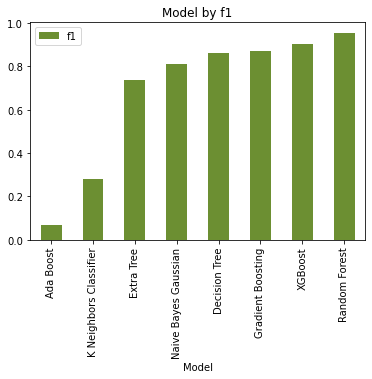

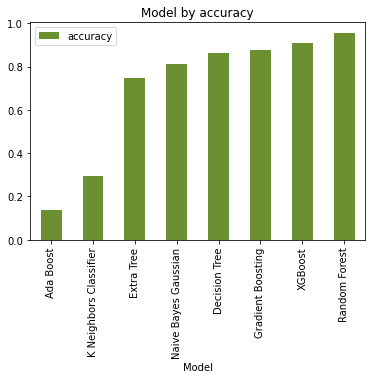

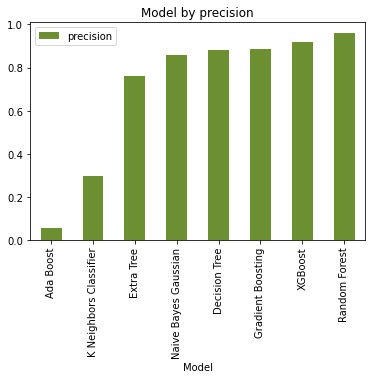

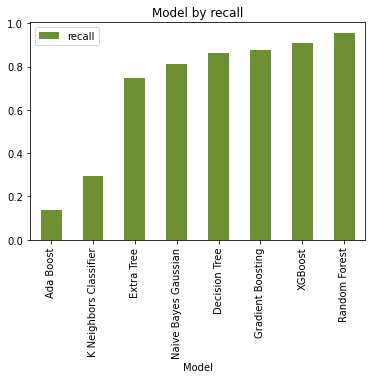

In [63]:
metrics_list = ["f1", "accuracy", "precision", "recall"]

for metric in metrics_list:
    classification_result.sort_values(by=metric).plot.bar("Model", metric, color = Avacado_color_5)
    plt.title(f"Model by {metric}")
    plt.show()

In [64]:
clf_rf = RandomForestClassifier(random_state=42)
preds = cross_val_predict(clf_rf, x_train_2, y_train_2, cv=5, n_jobs=-1)

In [65]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [66]:
print(metrics.classification_report(y_train_2, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.94      0.98      0.96        47
           2       0.98      1.00      0.99        44
           3       1.00      0.96      0.98        57
           4       0.96      0.98      0.97        50
           5       0.97      0.97      0.97        37
           6       0.98      1.00      0.99        57
           7       1.00      0.95      0.97        19
           8       1.00      1.00      1.00        16
           9       0.97      1.00      0.99        36
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        18
          14       0.94      1.00      0.97        17
          15       1.00      1.00      1.00        15
          16       0.88      0.78      0.82         9
          17       0.90    

### From Above observation its is evident that Randomforest is the best model with F1 Score of 0.95 lets try in Hyper tuning the same

In [67]:
param_grid = [
    {"n_estimators": range(20, 200, 20), 
     "bootstrap": [True, False],
     "criterion": ["gini", "entropy"],   
     "max_depth": [2, 4, 6, 8, 10, 12, 14, None],
     "max_features": ["auto", "sqrt", "log2"], 
     "min_samples_split": [2, 5, 10],
     "min_samples_leaf": [1, 2, 4],
     }
]

clf_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [70]:
clf_random = GridSearchCV(clf_rf, param_grid, cv=3,
                           scoring="f1_weighted", verbose=2, n_jobs=-1)

In [71]:
clf_random.fit(x_train_2, y_train_2)

Fitting 3 folds for each of 7776 candidates, totalling 23328 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 5832 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 6845 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 7938 tasks      | elapsed: 71.3min
[Parallel(n_jobs=-1)]: Done 9113 tasks      | 

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 4, 6, 8, 10, 12, 14, None],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': range(20, 200, 20)}],
             scoring='f1_weighted', verbose=2)

In [72]:
clf_random.best_params_ 

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 120}

In [73]:
clf_random.best_score_

0.9649259368644757

In [75]:
preds = cross_val_predict(clf_random.best_estimator_, x_train_2, y_train_2, cv=5, n_jobs=-1)
print(metrics.classification_report(y_train_2, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.94      1.00      0.97        47
           2       1.00      1.00      1.00        44
           3       1.00      0.96      0.98        57
           4       1.00      1.00      1.00        50
           5       0.97      0.97      0.97        37
           6       0.97      1.00      0.98        57
           7       0.95      0.95      0.95        19
           8       1.00      1.00      1.00        16
           9       0.97      1.00      0.99        36
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        18
          14       0.94      1.00      0.97        17
          15       1.00      1.00      1.00        15
          16       0.88      0.78      0.82         9
          17       0.90    

In [78]:
classifier_final_model = clf_random.best_estimator_
y_pred = classifier_final_model.predict(x_test_2)
 
pd.crosstab(y_test_2, y_pred, rownames = ['Actual'], colnames =['Predicted'])

Predicted,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
Actual,,,,,,,,,,,,,,,,,,,,,
0,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
conf_mx = metrics.confusion_matrix(y_test_2, y_pred)

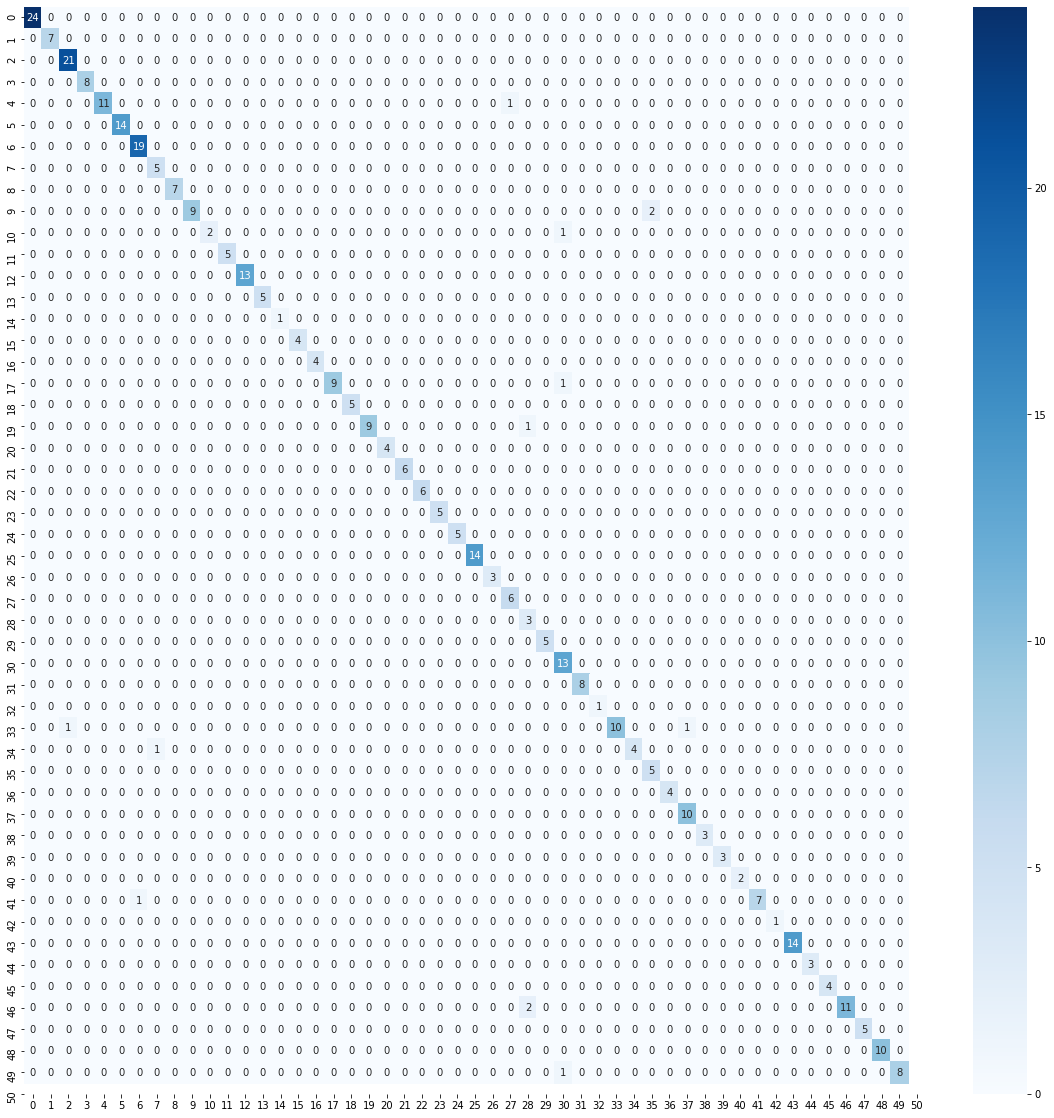

In [82]:
fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(conf_mx, annot=True, fmt="d", 
                 xticklabels=classifier_final_model.classes_,
                 yticklabels=classifier_final_model.classes_,
                cmap= "Blues")

### Post the hyper tuning we can see that the performance of the RandomForest Classifier has increased from 95% - 97%. 

# Summary:
>We started our EDA with removing the NAN values after 1510th row. We also analized and found skewness and outliers in the data but how-so-ever since the nature of the data itself is skewed we decided not to remove skewness and outliers.
>>We saw how every feature variable is related to target variable and how its correlated in above observation.
>We shortlisted the best performing model in two target variable and we have done hypertuning to increase the performance.
>Through the above analysis we can see that how RandomForestRegressor and RandomForestClassifier models have hypertuned in increased performance.
>And we have predicted the average price in the givendata which gives us 99% accuracy with given variable.
>And we have predicted the Region - the city or region of the observation with 97% of accuracy.
we will save the model for future prediction and use
>>>From our analysis we know which feature variable is important in the two target variable and in given data if one needs to know the average price and Region to a accuracy of 99% and 97% respectively can use our saved model.

# Saving the final model

In [83]:
import joblib
joblib.dump(reg_final_model,"Ava_averagepriceprediction.obj")

['Ava_averagepriceprediction.obj']

In [84]:
import joblib
joblib.dump(classifier_final_model,"Ava_Regionprediction.obj")

['Ava_Regionprediction.obj']

# Conclusion:
>This study aims to better understand avocado shoppers by developing a shopper segmentation based on their actual avocado purchase levels
>>MARKETERS & RETAILERS LEARN:
>What is the trend of the price.
>This study looks at 49 regional demographic variables for avocado-purchasing. Learn how avocado shopper demographics and purchases trends in each region.